In [552]:
#kernel-> lin_reg
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [553]:
data = pd.read_csv(r'C:\Users\z004uafj\Downloads\car_dataset\car_details_v4.csv')
data.head()

columns = data.columns

print('Number of columns:',len(columns))

data = data.drop(columns=['Transmission','Location','Owner'])

data.head()

Number of columns: 20


,Make,Model,Price,Year,Kilometer,Fuel Type,Color,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Grey,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,White,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Maroon,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Red,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Grey,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [554]:
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float)

data['Max Power NM'] = data['Max Power'].str.extract('(\d+\.?\d*)').astype(float)
data['Max Power rpm'] = data['Max Power'].str.extract('\D+(\d+\.?\d*)').astype(float)#  \D+(\d+\.?\d*)')
# data.drop(columns=['Max Power'])

data['Max Torque NM'] = data['Max Torque'].str.extract('(\d+\.?\d*)').astype(float)
data['Max Torque rpm'] = data['Max Torque'].str.extract('\D+(\d+\.?\d*)').astype(float)#  \D+(\d+\.?\d*)')
data = data.drop(columns=['Max Torque','Max Power','Drivetrain'])
data = data.reset_index(drop=True)
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Color,Seller Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power NM,Max Power rpm,Max Torque NM,Max Torque rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Grey,Corporate,1198.0,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,White,Individual,1248.0,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Maroon,Individual,1197.0,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,7619.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Red,Individual,1197.0,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Grey,Individual,2393.0,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0


In [555]:
def get_unique_cols(columns):
    # columns = data.columns
    col_unique_vals = {}
    for col in columns:
        data_unique = data[col].unique()
        col_unique_vals[col] = data_unique
    return col_unique_vals

dict = get_unique_cols(data)

In [556]:
list = ['Price','Kilometer','Year','Length','Width','Height','Fuel Tank Capacity','Max Power NM','Max Power rpm','Max Torque NM','Max Torque rpm']
for keys in dict:
    # print(keys)
    if keys in list:
        pass
    else:
        print(keys,'has',len(dict[keys]),'unique values')
    

Make has 33 unique values
Model has 1050 unique values
Fuel Type has 9 unique values
Color has 17 unique values
Seller Type has 3 unique values
Engine has 109 unique values
Seating Capacity has 7 unique values


In [557]:
# Manual encoding for 'Fuel Type' and 'Color' columns

# Create encoding dictionaries
fuel_type_encoding = {ftype: idx for idx, ftype in enumerate(data['Fuel Type'].unique())}
color_encoding = {color: idx for idx, color in enumerate(data['Color'].unique())}
seller_type_encoding = {seller_type: idx for idx,seller_type in enumerate(data['Seller Type'].unique()) }

# Apply encoding to the dataframe
data['Fuel Type'] = data['Fuel Type'].map(fuel_type_encoding)
data['Color'] = data['Color'].map(color_encoding)
data['Seller Type'] = data['Seller Type'].map(seller_type_encoding)

# Target encoding for high cardinality columns with respect to 'Price'
high_cardinality_cols = ['Make', 'Model']

for col in high_cardinality_cols:
    target_mean = data.groupby(col)['Price'].mean()
    data[col + '_enc'] = data[col].map(target_mean)

data = data.drop(columns=['Make','Model'])
data = data.dropna()
datas = data.reset_index(drop=True)

In [558]:
data.head()

,Price,Year,Kilometer,Fuel Type,Color,Seller Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power NM,Max Power rpm,Max Torque NM,Max Torque rpm,Make_enc,Model_enc
0,505000,2017,87150,0,0,0,1198.0,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,6.221076e+05,5.050000e+05
1,450000,2014,75000,1,1,1,1248.0,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,5.348000e+05,4.147142e+05
2,220000,2011,67000,0,2,1,1197.0,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,7619.0,7.232635e+05,2.931250e+05
3,799000,2019,37500,0,3,1,1197.0,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,1.729545e+06,7.622500e+05
4,1950000,2018,69000,1,0,1,2393.0,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0,1.729545e+06,1.927200e+06


In [559]:
data.columns

Index(['Price', 'Year', 'Kilometer', 'Fuel Type', 'Color', 'Seller Type',
       'Engine', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Max Power NM', 'Max Power rpm', 'Max Torque NM',
       'Max Torque rpm', 'Make_enc', 'Model_enc'],
      dtype='object')

In [560]:
data.head()

,Price,Year,Kilometer,Fuel Type,Color,Seller Type,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power NM,Max Power rpm,Max Torque NM,Max Torque rpm,Make_enc,Model_enc
0,505000,2017,87150,0,0,0,1198.0,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500.0,6.221076e+05,5.050000e+05
1,450000,2014,75000,1,1,1,1248.0,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000.0,5.348000e+05,4.147142e+05
2,220000,2011,67000,0,2,1,1197.0,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,7619.0,7.232635e+05,2.931250e+05
3,799000,2019,37500,0,3,1,1197.0,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200.0,1.729545e+06,7.622500e+05
4,1950000,2018,69000,1,0,1,2393.0,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400.0,1.729545e+06,1.927200e+06


In [561]:
y_true = data['Price']
y_true = y_true.reset_index(drop=True)
y_pred = np.zeros(len(y_true))
data = data.drop(columns=['Price'])
print(len(y_true))
print(len(y_pred))
print(data.shape)


1933
1933
(1933, 17)


In [562]:
# def initialize_wb(x):
#     w = np.ones(x)
#     b = np.zeros(1)
#     return w, b

# def wb_update(wi,bi,loss,xi):
#     lr = 0.001
#     weights = []
#     # weight update
#     for i in range(len(wi)):
#         w = wi[i] + 2*lr*xi[i]*(loss)
#         weights.append(w)
#     # bias update
#     b = bi[0] + 2*lr*(loss)

#     return weights,b
# def get_loss(y_pred,y_true):

#     loss = (y_true - y_pred)
#     mse = loss **2
#     return mse,loss

# def linear_regression(dataset, y_true):

#     #initialize weights and bias
#     number_of_weights = dataset.shape[1]
    
#     weights, b = initialize_wb(number_of_weights)
#     print('\nGenerated weights and biases size:', len(weights), len(b))

#     loss_history = []
#     # y_pred = []
#     for index, row in dataset.iterrows():
#         # while y_pred[index]:
#             # Compute prediction
#         if index<=1932:
#             pred = (np.dot(row.values, weights) + b)
#             y_pred[index] = pred
#             print('Index:', index, 'len(row.values):', len(row.values), 'len(weights):', len(weights))
#             print('len of y_pred & y_true', len(y_pred), len(y_true))
#             print('y_pred,y_true values:')
#             print(y_pred[index])
#             print(y_true[index])

#             mse, loss = get_loss(pred, y_true[index])
#             loss_history.append(mse)

#             # update weights
#             weights, b = wb_update(weights, b, loss, row.values.tolist())
#             print('###############weight updated############')
#             print('len(weights):', len(weights))

#     return y_pred

import numpy as np
import pandas as pd

def initialize_wb(x):
    w = np.ones(x)
    b = 0.0
    return w, b

def wb_update(wi, bi, loss, xi):
    lr = 0.001
    weights = []
    for i in range(len(wi)):
        w = wi[i] + 2 * lr * xi[i] * loss
        weights.append(w)
    b = bi + 2 * lr * loss
    return np.array(weights), b

def get_loss(y_pred, y_true):
    loss = y_true - y_pred
    mse = loss ** 2
    return mse, loss

def linear_regression(dataset, y_true):
    number_of_weights = dataset.shape[1]
    weights, b = initialize_wb(number_of_weights)

    y_pred = np.zeros(len(y_true))
    loss_history = []

    for i in range(dataset.shape[0]):
        xi = dataset.iloc[i].values
        if np.any(np.isnan(xi)):  # Skip if xi has NaNs
            print(f"NaN detected in input features at row {i}, skipping.")
            continue
            
        pred = np.dot(xi, weights) + b
        
        if np.isnan(pred):  # Check if prediction is NaN
            print(f"NaN detected in prediction at row {i}, skipping.")
            continue

        y_pred[i] = pred

        mse, loss = get_loss(pred, y_true[i])
        loss_history.append(mse)

        # Clip the weights and bias to avoid overflow/underflow
        weights, b = wb_update(weights, b, loss, xi)

        # Clip weights and bias after update if necessary
        weights = np.clip(weights, -1e10, 1e10)
        b = np.clip(b, -1e10, 1e10)
        print(y_pred[i],y_true[i])

    return y_pred


In [563]:
y_pred = linear_regression(data,y_true.to_list())
# print('y_pred',y_pred)

print('length of y_true:',len(y_pred),'and y_pred:',len(y_pred))

1235383.569620253 505000
-801566376579245.5 450000
1.1071812948512894e+16 220000
-2.550203378787879e+16 799000
3.743872178787879e+16 1950000
-1.3044809568181818e+16 675000
6.5122469256198344e+16 2650000
-2.96658495e+16 1390000
1.1594785e+16 575000
-1.3722345329512894e+16 591000
8514848023255814.0 459999
-1.5363449568181818e+16 1075000
2.739814789473684e+16 1695000
-1.56354269e+16 944999
1.1155026234848484e+16 569000
-1.0062909568181818e+16 449000
1.3920686234848484e+16 894999
-1.2851789568181818e+16 699000
1.5462745329512894e+16 740000
-1.0258269568181818e+16 470000
1.55257194e+16 765000
-1.2534975329512894e+16 589000
1.7679605329512894e+16 999000
-8280746234848484.0 370000
9039189568181818.0 325000
-1.9574595329512896e+16 1175000
1.0331205696202532e+16 351000
-1.370868199617956e+16 551000
1.4200015696202532e+16 819999
-1.8055105329512896e+16 990000
1.7519085329512894e+16 925000
-2.0558699791666668e+16 535000
1.020409199617956e+16 145000
-1.4396917894736842e+16 409000
1.540058789473684

In [564]:
len(loss_history)

1

In [565]:
# for index, row in data.iterrows():
#         # y_pred = np.dot(row.values, weights) + b
#         print('###########################')
#         print(index)

In [566]:
print(data.shape)

(1933, 17)


In [298]:
print(len(y_pred))

1933


In [299]:
print(len(y_true))

1933


In [170]:
data.shape

(1933, 17)

In [169]:
print(len(y_true))

1933


25


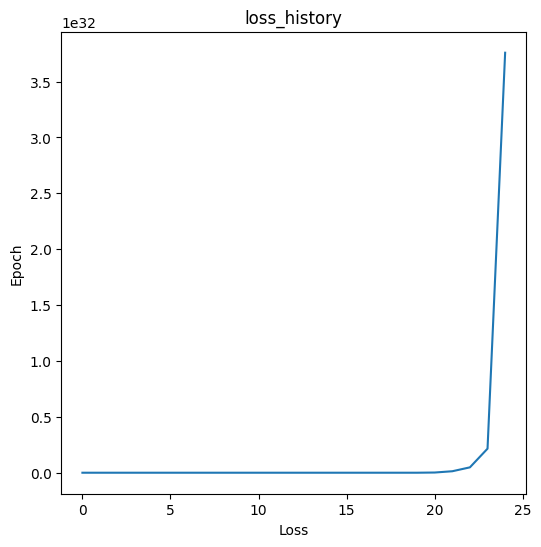

In [200]:
print(len(loss_history))

plt.figure(figsize=(6,6))
plt.plot(loss_history,label='Loss')
plt.title('loss_history')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()